In [27]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from google.colab import files

import os

# Utility Functions

In [28]:
def adding_problem_generator(N, seq_len=100):
    """ A data generator for adding problem.

    The data definition strictly follows Quoc V. Le, Navdeep Jaitly, Geoffrey E.
    Hintan's paper, A Simple Way to Initialize Recurrent Networks of Rectified
    Linear Units.

    The single datum entry is a 2D vector with two rows with same length.
    The first row is a list of random data; the second row is a list of binary
    mask with all ones, except two positions sampled by uniform distribution.
    The corresponding label entry is the sum of the masked data. For
    example:

     input          label
     -----          -----
    1 4 5 3  ----->   9 (4 + 5)
    0 1 1 0

    :param N: the number of the entries.
    :param seq_len: the length of a single sequence.
    :param p: the probability of 1 in generated mask
    :param high: the random data is sampled from a [0, high] uniform distribution.
    :return: (X, Y), X the data, Y the label.

    This function is referenced from minPy docs, and adjusted to match the spec
    found in original LSTM paper.
    """
    X_num = np.random.uniform(low=-1, high=1, size=(N, seq_len, 1))
    X_mask = np.zeros((N, seq_len, 1))
    Y = np.ones((N, 1))
    for i in range(N):
        X_mask[i, [0, -1]] = -1  # set first and last -1

        positions = [np.random.randint(low=0, high=10),
                     np.random.randint(low=seq_len/2, high=seq_len)]
        X_mask[i, positions] = 1
        
        if positions[0] == 0:
            X_num[i, 0] = 0
        
        
        Y[i, 0] = np.sum(X_num[i, positions])
    X = np.append(X_num, X_mask, axis=2)
    return X, Y

def download_to_local():
    !zip Adding_Problem.zip Adding_Problem
    files.download('Adding_Problem.zip')


# Model Class

In [ ]:
class Adding_Problem_lstm():
    def __init__(self, checkpoint_dir='Adding_Problem'):
        model = keras.models.Sequential()

        # model.add(keras.layers.LSTM(2, return_sequences=True))
        model.add(keras.layers.LSTM(2))
        model.add(keras.layers.Dense(1))

        model.compile(
            loss=keras.losses.mean_absolute_error,
            optimizer=keras.optimizers.Adam(),
            metrics=keras.metrics.mean_absolute_error,
        )   
        
        self.checkpoint_dir = checkpoint_dir
        self.model = model


    def train(self, X_train, Y_train, X_val, Y_val, batch_size=16, epochs=100,
              download=True):
        os.makedirs(self.checkpoint_dir, exist_ok=True)

        my_callbacks = [
            keras.callbacks.ModelCheckpoint(
                filepath=os.path.join(
                    self.checkpoint_dir,'model.{epoch:02d}.{loss:04f}.ckpt'),
                save_weights_only=True),
            keras.callbacks.TensorBoard(
                log_dir=os.path.join(self.checkpoint_dir, "logs")),
        ]

        hist = self.model.fit(
            X_train, Y_train, batch_size=batch_size, epochs=epochs, 
            callbacks=my_callbacks, validation_data=(X_val, Y_val))
        
        if download:
            download_to_local()
        
        return hist


    def evaluate(self, X_test, Y_test):
        if not os.path.exists(self.checkpoint_dir):
            uploaded = files.upload()  # please upload the checkpoints in zip format
            !unzip Adding_Problem.zip
        latest = tf.train.latest_checkpoint(self.checkpoint_dir)
        model.load_weights(latest)

        model.evaluate(X_test, Y_test)


# Train or Evaluate

In [ ]:
MODE = input("Select your mode: [train/eval]: ")

ap_lstm = Adding_Problem_lstm()
if MODE == 'train':
    X_train, Y_train = adding_problem_generator(10000)
    X_val, Y_val = adding_problem_generator(2000)

    ap_lstm.train(X_train, Y_train, X_val, Y_val)

if MODE == 'eval':
    X_test, Y_test = adding_problem_generator(2000)
    ap_lstm.evaluate(X_test, Y_test)

Epoch 1/100
  1/625 [..............................] - ETA: 0s - loss: 0.6014 - mean_absolute_error: 0.6014WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
625/625 [==============================] - 11s 17ms/step - loss: 0.6607 - mean_absolute_error: 0.6607 - val_loss: 0.6634 - val_mean_absolute_error: 0.6634
Epoch 2/100
625/625 [==============================] - 10s 17ms/step - loss: 0.6591 - mean_absolute_error: 0.6591 - val_loss: 0.6620 - val_mean_absolute_error: 0.6620
Epoch 3/100
625/625 [==============================] - 10s 17ms/step - loss: 0.6585 - mean_absolute_error: 0.6585 - val_loss: 0.6613 - val_mean_absolute_error: 0.6613
Epoch 4/100
625/625 [==============================] - 10s 16ms/step - loss: 0.6582 - mean_absolute_error: 0.6582 - val_loss: 

NameError: ignored

# Full FORCE

In [29]:
import FF_for_ap as FF

def adding_problem_FF(dt=1, N=10000, seq_len=100):
    """First Trial: make the second component hint input to Full FORCE.
    """
    del dt  # unused
    inp, target = adding_problem_generator(N, seq_len)

    target = np.expand_dims(target, axis=1)
    target = np.repeat(target, inp.shape[1], axis=1)

    hint = np.zeros(target.shape)

    return inp, target, hint

{'network_size': 2, 'dt': 1, 'tau': 1, 'noise_std': 0, 'g': 1, 'p': 1, 'inp_scale': 1, 'out_scale': 1, 'bias_scale': 0, 'init_act_scale': 1, 'num_epochs': 1, 'ff_steps_per_update': 2, 'ff_alpha': 1, 'ff_init_trials': 3, 'test_init_trials': 1}
Initializing...
Training network...
epoch 1 of 1,  10000 examples: 
progress.. 0/10000
progress.. 100/10000
progress.. 200/10000
progress.. 300/10000
progress.. 400/10000
progress.. 500/10000
progress.. 600/10000
progress.. 700/10000
progress.. 800/10000
progress.. 900/10000
progress.. 1000/10000
progress.. 1100/10000
progress.. 1200/10000
progress.. 1300/10000
progress.. 1400/10000
progress.. 1500/10000
progress.. 1600/10000
progress.. 1700/10000
progress.. 1800/10000
progress.. 1900/10000
progress.. 2000/10000
progress.. 2100/10000
progress.. 2200/10000
progress.. 2300/10000
progress.. 2400/10000
progress.. 2500/10000
progress.. 2600/10000
progress.. 2700/10000
progress.. 2800/10000
progress.. 2900/10000
progress.. 3000/10000
progress.. 3100/100

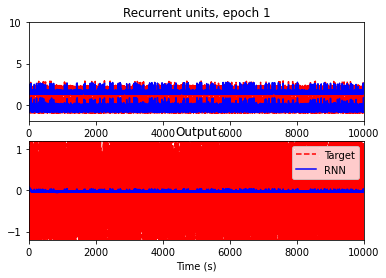

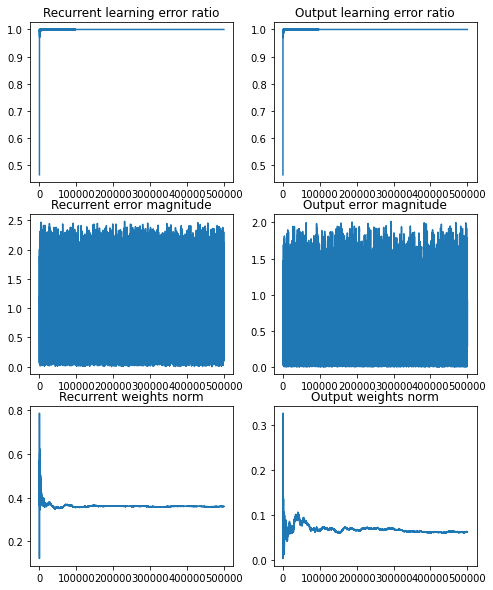

In [36]:
import importlib
importlib.reload(FF)
FF_hp = FF.create_parameters(dt=1, network_size=2)
FF_hp['num_epochs'] = 1
FF_hp['ff_steps_per_update'] = 2
print(FF_hp)

FF_rnn = FF.RNN(FF_hp, 2, 1)  # 1 input since sencond component is set to hint.
FF_rnn.train(adding_problem_FF, monitor_training=1, N=10000, seq_len=100)